In [138]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

In [139]:
# Первое задание
def getFirstField(size, potential):
    field = np.zeros((size, size));
    for y in range(size):
        for x in range(size):
            check = y == 0 or y == size - 1 or x == 0 or x == size - 1;
            if check:
                field[x,y] = potential;
            else:
                field[x,y] = potential * 0.95;

    return field;

# Второе задание
def getSecondField(size, potential):
    field = np.zeros((size, size));
    for y in range(size):
        for x in range(size):
            check = y == 0 or y == size - 1 or x == 0 or x == size - 1;
            if check:
                field[x,y] = potential;

            if x == 5 and y == 5:
                field[x,y] = 4;

    return field;

# Третье задание    
def getThirdField(size, potential):
    field = np.zeros((size, size));
    for y in range(size):
        for x in range(size):
            upDownCheck = y == 0 or y == size - 1;
            LeftRightCheck = x == 0 or x == size - 1;
            if upDownCheck:
                field[x,y] = potential;

            if LeftRightCheck:
                field[x,y] = potential / 2;

    return field;

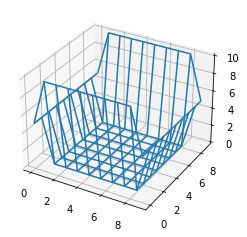

Шаг: 201


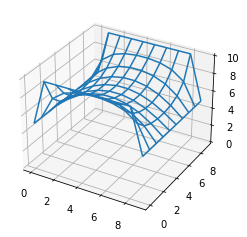

In [140]:
def nextStep(field, size):
    for y in range(size):
        for x in range(size):
            check = y == 0 or y == size - 1 or x == 0 or x == size - 1;
            if check:
                continue;

            field[x,y] = 0.25 * (field[x+1,y] + field[x-1, y] + field[x,y+1] + field[x,y-1]);

    return field;

def getVMin(field, size):    
    vMin = float('inf');
    for y in range(size):
        for x in range(size):
            if field[x,y] < vMin:
                vMin = field[x,y];
    return vMin;

def draw(field, size):
    fig = plt.figure();
    ax = fig.gca(projection='3d');

    X = range(size);
    Y = range(size);
    X, Y = np.meshgrid(X, Y);
    Z = field[X, Y];

    ax.plot_wireframe(X, Y, Z);
    #ax.plot_surface(X, Y, Z, linewidth=0);

    ax.set_zlim(0, 10)
    #ax.w_zaxis.set_major_locator(LinearLocator(6))

    plt.show()


    return;

def main():
    size = 10;
    potential = 10;
    
    #sample  = getFirstField(size, potential);
    #sample  = getSecondField(size, potential);
    sample  = getThirdField(size, potential);
    field = sample.copy();
    step = 0;

    draw(sample, size);

    while True:
        field = nextStep(field, size);
        vMin = getVMin(field, size);
        step += 1;        
        d = math.fabs(10 - vMin) / 10 * 100;
        #print("U5x5: " + str(field[5,5]));
        #draw(field, size);

        if d < 1 or step > 200:
            break;

    print("Шаг: " + str(step));
    #print("Точность: " + str(d));
    #print("Umin: " + str(vMin));
    draw(field, size);
    return;

main();